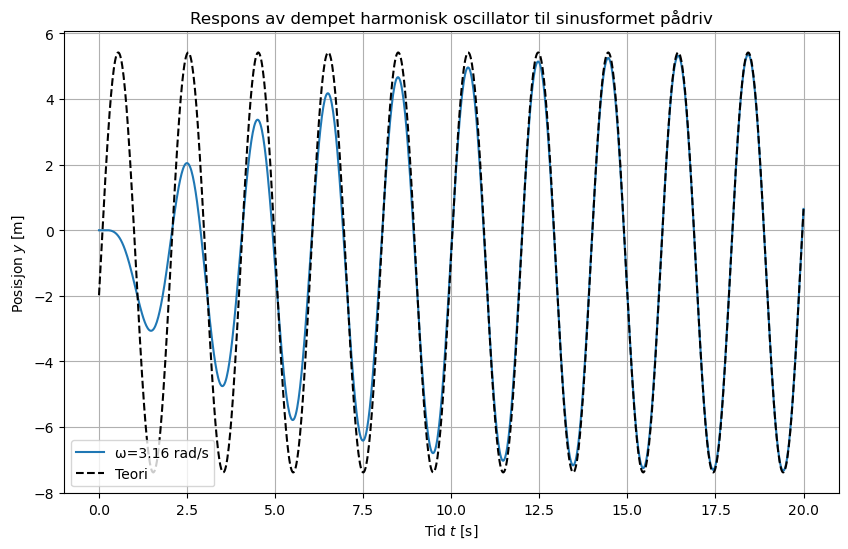

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 0.1  # Masse [kg]
k = 1.0  # Fjærkonstant [N/m]
b = 0.05  # Dempningskoeffisient [N·s/m]
g = 9.81  # Tyngdens akselerasjon [m/s^2]
Y0 = 1.0  # Amplituden til forskyvningen [m]

t_span = (0, 100)  # Tidsintervall for simuleringen [s]

omega0 = np.sqrt(k / m)  # Egenfrekvens [rad/s]
gamma = b / (2 * m)  # Dempningsforhold [1/s]

def rhs(t, y, g, gamma, omega0, Y0, omega):
    x, v = y
    dxdt = v
    dvdt = -g - 2 * gamma * v - omega0**2 * x + Y0 * omega * ( 2 * gamma * np.sin(omega*t) + omega * np.cos(omega * t) )
    #dvdt = -g - 2 * gamma * v - omega0**2 * x + Y0 * omega * ( - 2 * gamma * np.cos(omega*t) + omega * np.sin(omega * t) )
    return [dxdt, dvdt]

def arctan3(y, x):
    if x > 0:
        return np.arctan(y / x)
    elif x < 0:
        return np.arctan(y / x) + np.pi
    return np.pi / 2

omega_ = [omega0] # np.linspace(0.5 * omega0, 1.5 * omega0, 10)  # Frekvensområde for sveipet [rad/s]
amplitudes = []

fig, ax = plt.subplots(figsize=(10, 6))

for omega in omega_:
    sol = solve_ivp(rhs, t_span, [0, 0], args=(g, gamma, omega0, Y0, omega), t_eval=np.linspace(0, 20, 1000), max_step=0.01)
    t_ = sol.t
    
    ax.plot(t_, sol.y[0], label=f'ω={omega:.2f} rad/s')

    A = Y0 * omega * np.sqrt((omega**2 + 4*gamma**2)/((omega0**2 - omega**2)**2 + (2 * gamma * omega)**2))
    phi = arctan3(2 * gamma * omega0**2, omega*(omega0**2 - omega**2 - 4*gamma**2))

    ax.plot(t_, - g*omega0**-2 + A * np.cos(omega*t_ - phi), 'k--', label='Teori')

    x = sol.y[0]
    amplitudes.append(np.max(np.abs(x)))

ax.set_title('Respons av dempet harmonisk oscillator til sinusformet pådriv')
ax.set_xlabel('Tid $t$ [s]')
ax.set_ylabel('Posisjon $y$ [m]')
ax.legend()
plt.grid()
plt.show()


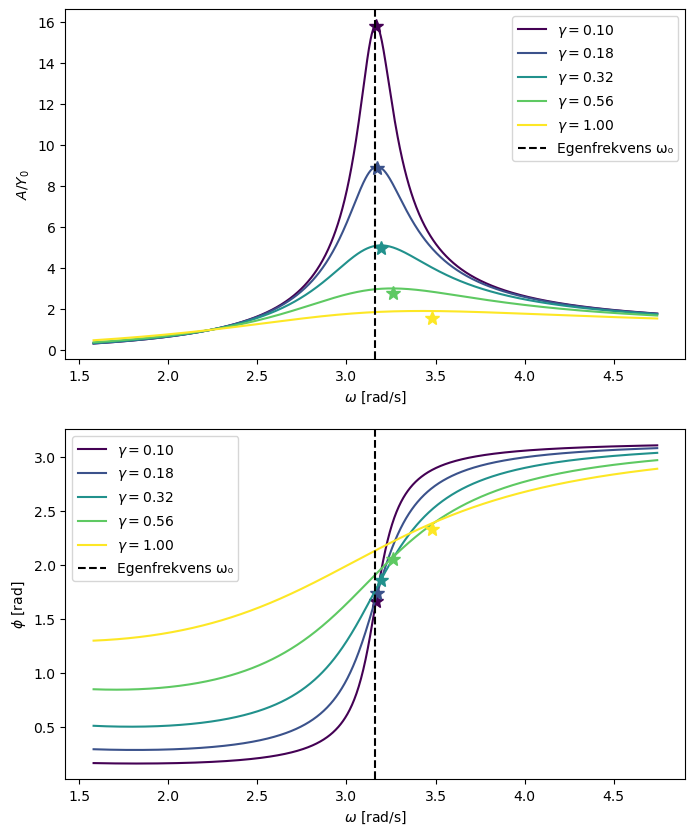

In [ ]:
omega_ = np.linspace(0.5 * omega0, 1.5 * omega0, 1000)  # Frekvensområde for sveipet [rad/s]

gamma_ = np.logspace(-1, 0, 5)  # Forskjellige dempningsverdier å sammenligne
loggamma_ = np.log10(gamma_)

# definer fargeskala for forskjellige gamma-verdier
c = plt.cm.viridis((loggamma_ - loggamma_.min()) / (loggamma_.max() - loggamma_.min()))

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

for i, gamma in enumerate(gamma_):
    A_red_ = omega_ * np.sqrt((omega_**2 + 4*gamma**2)/((omega0**2 - omega_**2)**2 + (2 * gamma * omega_)**2))
    phi_ = np.arctan2(2 * gamma * omega0**2, omega_*(omega0**2 - omega_**2 - 4*gamma**2))

    omega_res_ = omega0 * np.sqrt( (1 + np.sqrt(1 + 8 * gamma**2 / omega0**2))/2)
    omega_res_approx = omega0 * (1 + gamma**2 / omega0**2)

    Amax_approx = Y0 * omega0 / (2 * gamma)

    phi_res_approx = np.pi/2
    phi_res_approx1 = np.pi - np.arctan(omega0 / (3*gamma))

    ax[0].plot(omega_, A_red_, label=rf"$\gamma={gamma:.2f} s$^{-1}$", color=c[i])

    #ax[0].axvline(omega_res, color=, linestyle='--', label='Resonant Frequency ωᵣ')
    #ax[0].axvline(omega_res_approx, color=c[i], linestyle='--')
    #ax[0].axhline(Amax_approx, color=c[i], linestyle='--')
    ax[0].plot([omega_res_approx], [Amax_approx], marker='*', markersize=10, color=c[i])

    ax[1].plot(omega_, phi_, label=rf"$\gamma={gamma:.2f} s$^{-1}$", color=c[i])
    #ax[1].axvline(omega_res_approx, color=c[i], linestyle='--')
    #ax[1].axhline(phi_res_approx1, color=c[i], linestyle='--')

    ax[1].plot([omega_res_approx], [phi_res_approx1], marker='*', markersize=10, color=c[i])

ax[0].set_ylabel(r"$A/Y_0$")
ax[0].set_xlabel(r"$\omega$ [rad/s]")

ax[1].set_ylabel(r"$\phi$ [rad]")
ax[1].set_xlabel(r"$\omega$ [rad/s]")


ax[0].axvline(omega0, color='k', linestyle='--', label='Egenfrekvens ω₀')
ax[1].axvline(omega0, color='k', linestyle='--', label='Egenfrekvens ω₀')

ax[0].legend()
ax[1].legend()

fig.savefig("resonans_1.pdf")

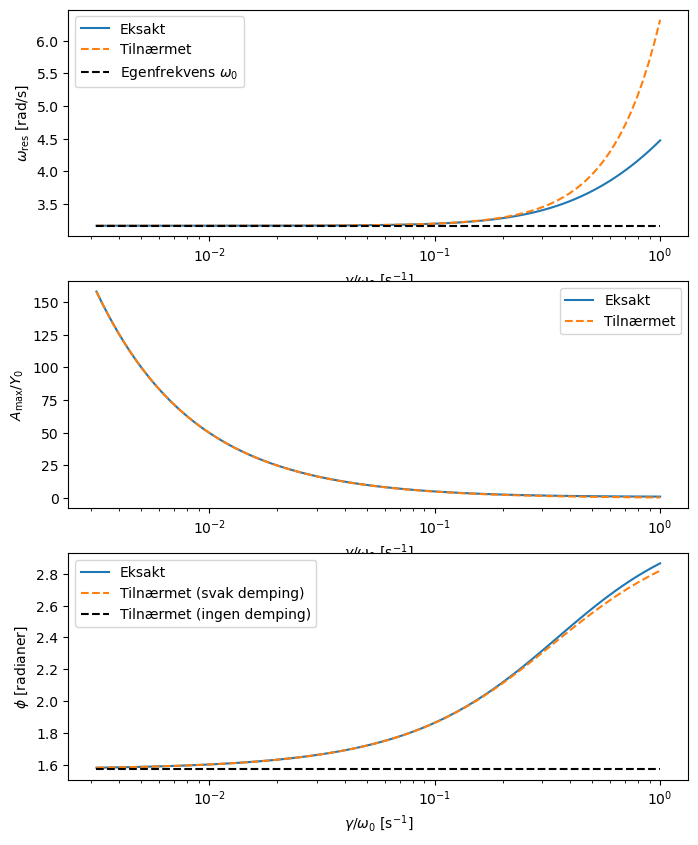

In [145]:
gamma_ = np.logspace(-2, np.log10(omega0), 100)  # Forskjellige dempningsverdier å sammenligne

omega_res_ = omega0 * np.sqrt( (1 + np.sqrt(1 + 8 * gamma_**2 / omega0**2))/2)
omega_res_approx = omega0 * (1 + gamma_**2 / omega0**2)

Amax = omega_res_ * np.sqrt((omega_res_**2 + 4*gamma_**2)/((omega0**2 - omega_res_**2)**2 + (2 * gamma_ * omega_res_)**2))
Amax_approx = Y0 * omega0 / (2 * gamma_)

phi_res = np.arctan2(2 * gamma_ * omega0**2, omega_res_*(omega0**2 - omega_res_**2 - 4*gamma_**2))
phi_res_approx1 = np.pi - np.arctan(omega0 / (3*gamma_))
phi_res_approx = np.pi/2 * np.ones_like(gamma_)

fig, ax = plt.subplots(3, 1, figsize=(8, 10))

ax[0].plot(gamma_ / omega0, omega_res_, label='Eksakt')
ax[0].plot(gamma_ / omega0, omega_res_approx, label='Tilnærmet', linestyle='--')
ax[0].plot(gamma_ / omega0, omega0 * np.ones_like(gamma_), 'k--', label=r"Egenfrekvens $\omega_0$")

ax[0].set_xscale('log')
ax[0].set_xlabel(r"$\gamma / \omega_0$ [s$^{-1}$]")
ax[0].set_ylabel(r"$\omega_{\mathrm{res}}$ [rad/s]")
ax[0].legend()

ax[1].plot(gamma_ / omega0, Amax, label='Eksakt')
ax[1].plot(gamma_ / omega0, Amax_approx, label='Tilnærmet', linestyle='--')
ax[1].set_xscale('log')
ax[1].set_xlabel(r"$\gamma / \omega_0$ [s$^{-1}$]")
ax[1].set_ylabel(r"$A_{\mathrm{max}}/Y_0$")
ax[1].legend()

ax[2].plot(gamma_ / omega0, phi_res, label='Eksakt')
ax[2].plot(gamma_ / omega0, phi_res_approx1, label='Tilnærmet (svak demping)', linestyle='--')
ax[2].plot(gamma_ / omega0, phi_res_approx, label='Tilnærmet (ingen demping)', linestyle='--', color='k')
ax[2].set_xscale('log')
ax[2].set_xlabel(r"$\gamma / \omega_0$ [s$^{-1}$]")
ax[2].set_ylabel(r"$\phi$ [radianer]")
ax[2].legend()

fig.savefig("resonans_2.pdf")